In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

**1A Answer:** 

In [4]:
gdp_le = pd.read_csv('../data/gdp_le.csv')

<Axes: xlabel='Year', ylabel='Life_Expectancy'>

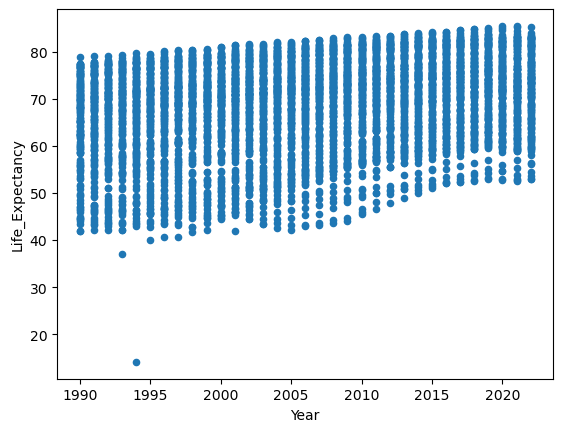

In [5]:
gdp_le.plot(kind='scatter', x='Year', y='Life_Expectancy')

1. Start by fitting a linear regression model with target being life expectancy and predictor variable year.  

In [7]:
lr_le_year = smf.ols("Life_Expectancy ~ Year", data=gdp_le).fit()

A. What coefficients do you get? Interpret the meaning of these coefficients. 

In [9]:
lr_le_year.params

Intercept   -468.138140
Year           0.267722
dtype: float64

**Interpretation:** For every one unit change in year, we expect the average life expectancy to change by .267722. The average life expectancy is predicted to be -468.138140 in year 0. This is an extrapolation because the minimum year is 1990, so any values before that would lead to an unreliable bet of predicting life expectancy.

B. Using just the year makes the intercept term difficult to interpret. Create a new model, but this time use years since 1990 as your predictor variable. Inspect the new coefficients and interpret the meaning of them. Are they statistically significant?

In [12]:
lr_le_year = smf.ols('Life_Expectancy ~ I(Year-1990)', data=gdp_le).fit()

In [13]:
lr_le_year.params

Intercept         64.628889
I(Year - 1990)     0.267722
dtype: float64

**Interpretation**
64.628889 is the predicted average life expectancy at year 1990. For every one unit change in year, we expect the average life expectancy to change 0.267722. 

**Checking Assumptions For Statistical signifignace:** Assumptions of Linear Regression
1. Linearity - we observe linearity through the scatterplot of the dataset
2. Independent Errors(outliers & influential points) - we can safely assume the errors are independent due to our random sampling.
3. Normally distributed errors - Based on the histogram and p-value produced by jarque_bera, the third assumption is violated. The distributions of values are left skewed.
4. The errors have Equal variance(constant variability) - based on the het_breuschpagan test we reject the null hypothesis. 

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.400e+01, 2.290e+02, 4.370e+02,
        7.800e+02, 1.049e+03, 1.739e+03, 1.255e+03]),
 array([-51.6017779 , -45.02078174, -38.43978557, -31.8587894 ,
        -25.27779324, -18.69679707, -12.1158009 ,  -5.53480473,
          1.04619143,   7.6271876 ,  14.20818377]),
 <BarContainer object of 10 artists>)

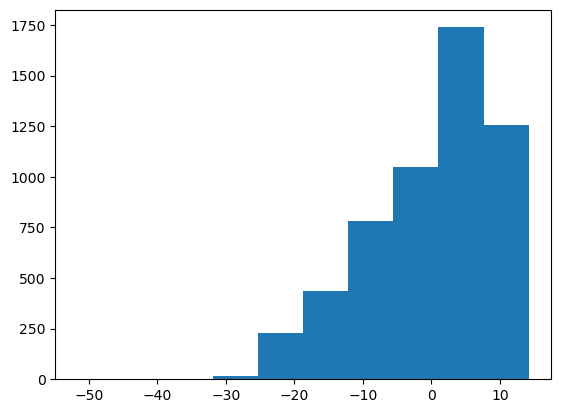

In [16]:
plt.hist(lr_le_year.resid)

In [17]:
sms.jarque_bera(lr_le_year.resid)

(469.13755422457047,
 1.3429952398340287e-102,
 -0.7094491570127848,
 2.8200402423092426)

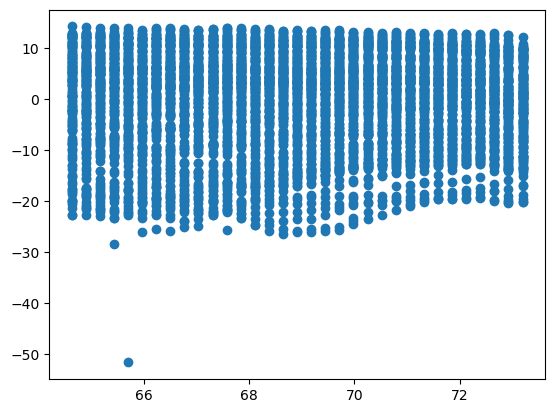

In [18]:
plt.scatter(lr_le_year.fittedvalues, lr_le_year.resid) # we are checking visually if the variance across the predictor variables is constant

In [19]:
sms.het_breuschpagan(lr_le_year.resid, lr_le_year.model.exog)

(99.86814077557742,
 1.6288853146578397e-23,
 101.67674010568732,
 1.049110896717647e-23)

C. Compare the actual mean life expectancy per year to the model's estimate. How well does it do?  

In [21]:
yearly_values = gdp_le.groupby('Year')['Life_Expectancy'].mean().reset_index()
yearly_values['Mean_Estimate'] = lr_le_year.predict(yearly_values)
yearly_values.head(1)

,Year,Life_Expectancy,Mean_Estimate
0,1990,64.745253,64.628889


<Axes: xlabel='Year'>

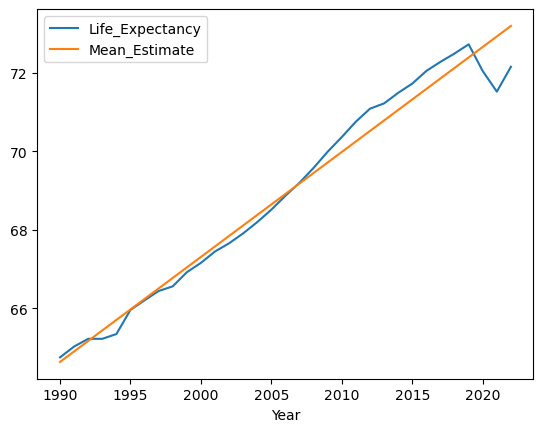

In [22]:
fig, ax = plt.subplots()
yearly_values.plot(kind='line', x='Year', y='Life_Expectancy', ax=ax)
yearly_values.plot(kind='line', x='Year', y='Mean_Estimate', ax=ax)

D. Plot the actual values against your model's estimates for the mean life expectancy.  

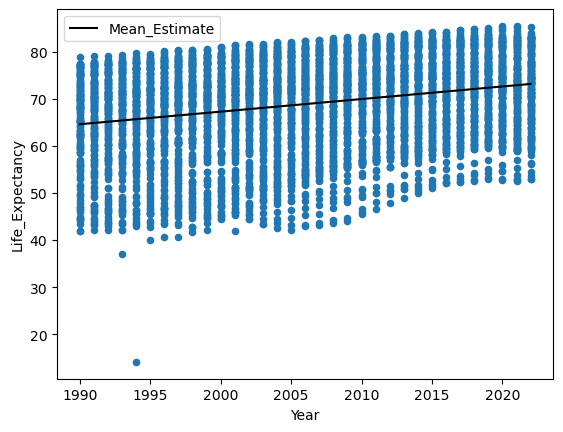

In [24]:
fig, ax = plt.subplots()
gdp_le.plot(kind='scatter', x='Year', y='Life_Expectancy', ax=ax)
yearly_values.plot(kind='line', x='Year', y='Mean_Estimate', color='black', ax=ax);

E. Inspect the R-squared value for the model. does it make sense, given the plot?   

In [26]:
lr_le_year.rsquared

0.07154748843194647

**Interpretation**:O nly about 7 percent variability in life expectancy can be attributed to changes in the year, which makes sense because there is a ton of other variables that affect life expectancy. 

2. Filter the full dataset down to just the year 2021. Fit a linear regression model with target being life expectancy and predictor variable gdp per capita.  

In [29]:
gdp_le_2021 = gdp_le.loc[gdp_le['Year'] == 2021]

<Axes: xlabel='GDP_Per_Capita', ylabel='Life_Expectancy'>

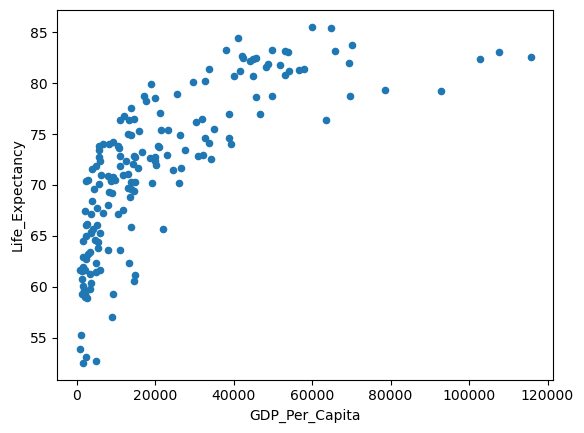

In [30]:
gdp_le_2021.plot(kind='scatter', x='GDP_Per_Capita', y='Life_Expectancy') # I am just inspecting the shape of the observations.

In [31]:
lr_le_gdp = smf.ols('Life_Expectancy ~ GDP_Per_Capita', data=gdp_le_2021).fit()

a. What coefficients do you get? Interpret the meaning of those coefficients. 

In [33]:
lr_le_gdp.params

Intercept         65.949870
GDP_Per_Capita     0.000257
dtype: float64

**Interpretation:** 65.94870 is the predicted life expectancy when gdp per capita is 0. For every one($1) unit change in gdp per capita we expect a 0.000257 change in the estimated average life expectancy.

b. Refit your model, but this time use thousands of dollars of gdp per capita as your predictor. How does this change your coefficients?

In [36]:
lr_le_gdp = smf.ols('Life_Expectancy ~ I(GDP_Per_Capita/1000)', data=gdp_le_2021).fit()

In [37]:
lr_le_gdp.params

Intercept                   65.949870
I(GDP_Per_Capita / 1000)     0.256892
dtype: float64

**Interpretation:** For every one ($1000) unit change in gdp per capita we expect a 0.256892 change in the estimated average life expectancy.

c. Are the coefficients statistically significant? 

**Checking Assumptions For Statistical signifignace :** Assumptions of Linear regressions
1. Linearity - The condition is satisfied based on the linear observation between the variables in the scatterplot. 
2. Independent errors - We used a random sample, so we assume this condition is satisfied.
3. *Violated* - Errors Normally distributed - Null hypothesis states the dataset is normally distributed. Based on the Jarque-Bera test we derived a p-value of 0.001 -- we reject the null hypothesis -- the dataset distribution is not normal. 
4. -- Equal Variability - Null hypothesis states the variability of observations around the least squares regression are constant. Based on the het_breuschpagan test we derived a p-value of .309 -- we fail to reject the null hypothesis. 

In [41]:
sms.jarque_bera(lr_le_gdp.resid)

(12.724842533019249,
 0.0017251845192994518,
 -0.663772598543498,
 2.9459646075602683)

(array([ 5.,  5.,  5., 17., 13., 26., 32., 32., 28., 10.]),
 array([-14.53845349, -12.16985805,  -9.80126261,  -7.43266717,
         -5.06407172,  -2.69547628,  -0.32688084,   2.0417146 ,
          4.41031004,   6.77890549,   9.14750093]),
 <BarContainer object of 10 artists>)

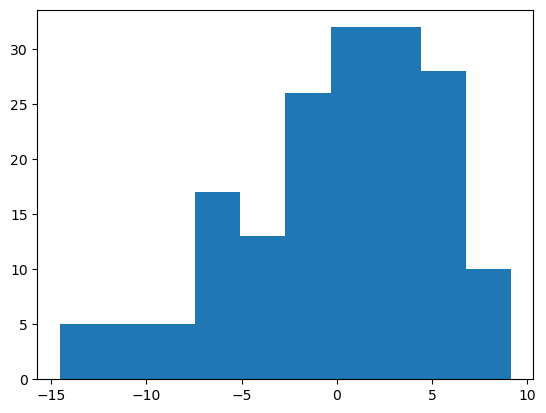

In [42]:
plt.hist(lr_le_gdp.resid)

In [43]:
sms.het_breuschpagan(lr_le_gdp.resid, lr_le_gdp.model.exog)

(1.0321627180645492,
 0.3096512481674583,
 1.0263536925202543,
 0.31244794073203624)

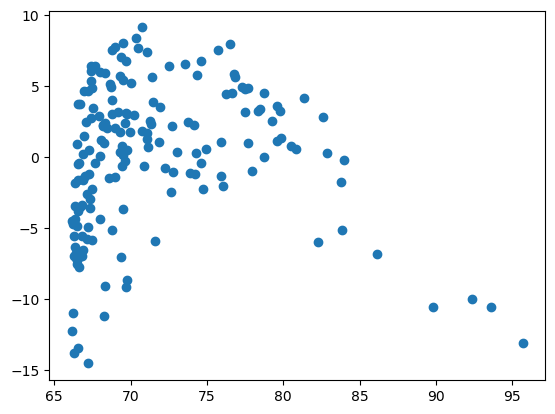

In [44]:
plt.scatter(lr_le_gdp.fittedvalues, lr_le_gdp.resid) 

In [72]:
lr_le_gdp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     213.4
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           6.81e-32
Time:                        16:00:54   Log-Likelihood:                -529.25
No. Observations:                 173   AIC:                             1062.
Df Residuals:                     171   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   65.9499      0.549    120.225      0.000      64.867      67.033
I(GDP_Per_Capita / 1000)     0.2569      0.018     14.608      0.000       0.222       0.292
==============================================================================
Omnibus:                       11.676   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.725
Skew:                          -0.664   Prob(JB):                      0.00173
Kurtosis:                       2.946   Cond. No.                         43.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation:** Our p-values suggest our coefficients are statistically significant, but our errors are not normally distributed.

D. What does your model estimate for the mean life expectancy for a country whose gdp per capita is 50,000? What about one whose gdp per capita is 100,000?

In [50]:
lr_le_gdp.predict(
    pd.DataFrame({
        'GDP_Per_Capita': [50000, 100000]
    })
)

0    78.794457
1    91.639045
dtype: float64

**Interpretation:** For GDP per capita of 50000 there is an average life expectancy of 78.794457, and for GDP per capita of 100000 there is an average life expectancy of 91.639045.

e. Plot the actual values compared to your model's estimates for mean life expectancy. How would you assess the model's fit?

In [132]:
pred_df = pd.DataFrame(
    {
        'GDP_Per_Capita': np.linspace(start=gdp_le_2021['GDP_Per_Capita'].min(), stop=gdp_le_2021['GDP_Per_Capita'].max())
    }
)
pred_df['Estimated_Mean'] = lr_le_gdp.predict(pred_df)     

<Axes: xlabel='GDP_Per_Capita', ylabel='Life_Expectancy'>

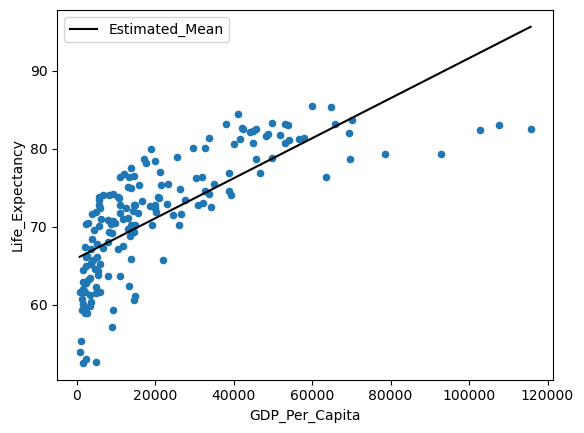

In [134]:
fig, ax = plt.subplots()
gdp_le_2021.plot(kind='scatter', x='GDP_Per_Capita', y='Life_Expectancy', ax=ax)
pred_df.plot(kind='line', x='GDP_Per_Capita', y='Estimated_Mean', color='black', ax=ax)

In [64]:
lr_le_gdp.rsquared

0.555146054691391

**Interpretation:** In the beginning of the model there is more varability below the line, then the varability becomes more
present above the model.

3. Now, fit a model for life expectancy based on the log of gdp per capita.  

In [77]:
lr_le_log_gdp = smf.ols('Life_Expectancy ~ np.log(GDP_Per_Capita)', data=gdp_le_2021).fit()

a. Inspect the coefficients for this model. Are they statistically significant?

**Interpretation:** They're statistically significant but they violate the normmaly distributed error condition. We can bootstrap to smooth this out and provide similar confidence intervals. 

In [85]:
lr_le_log_gdp.params

Intercept                 18.946970
np.log(GDP_Per_Capita)     5.589014
dtype: float64

**Checking Statistical Signifigance Assumptions:**
1. Linearity - The condition is satisfied based on the linear observation between the variables in the scatterplot. 
2. Independent errors - We used a random sample, so we assume this condition is satisfied.
3. *Violated * Errors Normally distributed - Null hypothesis states the dataset is normally distributed. Based on the Jarque-Bera test we derived a p-value of basically 0. -- we reject the null hypothesis. The errors aren't normally distributed.
4. Equal Variability - Null hypothesis states the variability of observations around the least squares regression remains constant. Based on the het_breuschpagan test we derived a p-value of .11 -- we fail to reject the null hypothesis -- the values around the least square lines are constant. 

In [90]:
sms.jarque_bera(lr_le_log_gdp.resid)

(18.921818757307857,
 7.783577662769136e-05,
 -0.724533395659447,
 3.724705203405056)

(array([ 3.,  3.,  3.,  5., 22., 33., 38., 31., 25., 10.]),
 array([-13.78652303, -11.61719861,  -9.4478742 ,  -7.27854979,
         -5.10922538,  -2.93990096,  -0.77057655,   1.39874786,
          3.56807227,   5.73739669,   7.9067211 ]),
 <BarContainer object of 10 artists>)

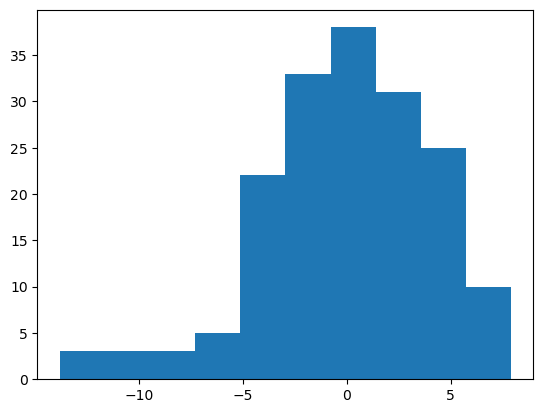

In [92]:
plt.hist(lr_le_log_gdp.resid)

In [94]:
sms.het_breuschpagan(lr_le_log_gdp.resid, lr_le_log_gdp.model.exog)

(2.456583536135878,
 0.11703308952220823,
 2.463160369302461,
 0.11839264443085522)

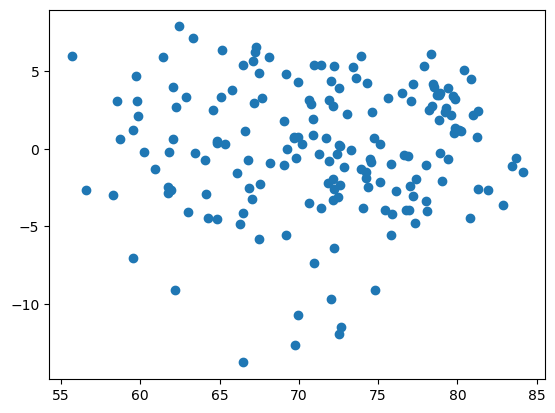

In [96]:
plt.scatter(lr_le_log_gdp.fittedvalues, lr_le_log_gdp.resid)

### Bootstrap to fix violated assumption? (In this case our errors arent normally distributed)
We bootstrap to know the varbility in our models estimates. we are creating new samples out of our existing samples. We want to produce our confidence intervals. 

In [109]:
bootstrap_coef = []

for _ in range(1000):
    boot_df = gdp_le.sample(n=len(gdp_le_2021), replace=True).copy()
    lr_boot = smf.ols('Life_Expectancy ~ np.log(GDP_Per_Capita)', data=boot_df).fit()
    bootstrap_coef.append(lr_boot.params['np.log(GDP_Per_Capita)'])

In [111]:
np.quantile(bootstrap_coef, q = [0.025, 0.975])

array([5.88766548, 7.19193504])

In [143]:
lr_le_log_gdp.params

Intercept                 18.946970
np.log(GDP_Per_Capita)     5.589014
dtype: float64

b. Interpret these coefficients. What does the model estimate for the average life expectancy for countries with a gdp per capita of 50,000? What about for those with a gdp per capita of $100,000?

**Interpretation** If we increase out GDP per capita by 1, the estimated average life expectancy increases by 5.589014. Scaling the x-axis using log function converts it a percentage base. 

In [148]:
pred_df = pd.DataFrame(
    {
        'GDP_Per_Capita': [50000, 100000]
    }
)
pred_df['Mean_Estimate'] = lr_le_log_gdp.predict(pred_df)

In [150]:
pred_df

,GDP_Per_Capita,Mean_Estimate
0,50000,79.418861
1,100000,83.292870


Note: When using logged predictors, a 1% increase in the predictor correponds to approximately b1/100 increase in the estimate. We are looking at percent changes in gdp per capita not a fixed change. 

c. Plot the actual values compared to your models' estimates for the mean life expectancy. How does this compare to the non-logged model?

**3c Answer:** This line has a better fit. Its r squred value of .717 confirms a better fit too. 

In [161]:
pred_df = pd.DataFrame(
    {
        'GDP_Per_Capita': np.linspace(start=gdp_le_2021['GDP_Per_Capita'].min(), stop=gdp_le_2021['GDP_Per_Capita'].max())
    }
)
pred_df['Mean_Estimate'] = lr_le_log_gdp.predict(pred_df)

<Axes: xlabel='GDP_Per_Capita', ylabel='Life_Expectancy'>

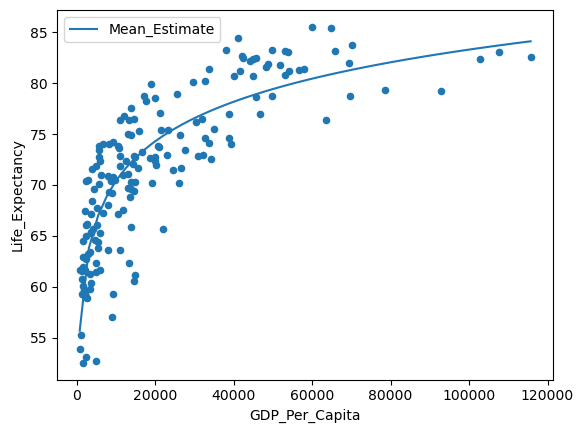

In [163]:
fix, ax = plt.subplots()
gdp_le_2021.plot(kind='scatter', x='GDP_Per_Capita', y='Life_Expectancy', ax=ax)
pred_df.plot(kind='line', x='GDP_Per_Capita', y='Mean_Estimate', ax=ax)

4. Finally, return to the full dataset.

A. First, fit a linear regression model for life expectancy based on the log of gdp per capita.

In [167]:
lr_le_log_gdp = smf.ols('Life_Expectancy ~ np.log(GDP_Per_Capita)', data=gdp_le).fit()

B. Then, add the year variable to your model. How can you interpret the coefficient associated with year? What limitations or weaknesses might this model have?

In [179]:
lr_le_log_gdp = smf.ols('Life_Expectancy ~ np.log(GDP_Per_Capita) + I(Year-1990)', data=gdp_le).fit()

In [181]:
lr_le_log_gdp.params

Intercept                 8.561151
np.log(GDP_Per_Capita)    6.359936
I(Year - 1990)            0.134487
dtype: float64

**Interpretations:** A one unit change in the GDP per capita and year changes the life expectancy by the sum of the two variables. We are not working with a simple random sample. We are not considering the structure of the data. 